In [22]:
%config Completer.use_jedi = False
%pwd
%run lib/viz_2.py

'G:\\My Drive\\research\\shot_chart'

viz lib loaded


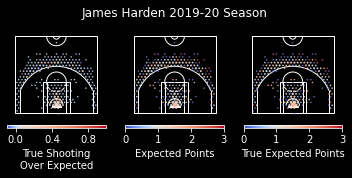

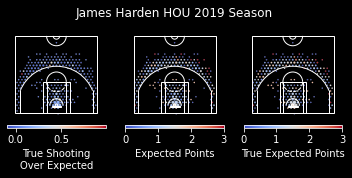

In [14]:



draw_player_season_all("James Harden", 2019, play_by_play_bins=play_by_play_bins)
draw_player_team_season_all("James Harden", "HOU", 2019, play_by_play_season_player_team_bins=play_by_play_season_player_team_bins)
#draw_player_season_all("Stephen Curry", 2019, play_by_play_bins=play_by_play_bins)
#draw_player_season_all("Jimmy Butler", 2019, play_by_play_bins=play_by_play_bins)
#draw_player_season_all("LeBron James", 2019, play_by_play_bins=play_by_play_bins)
#draw_player_season_all("Dwight Howard", 2019, play_by_play_bins=play_by_play_bins)


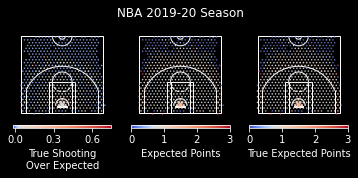

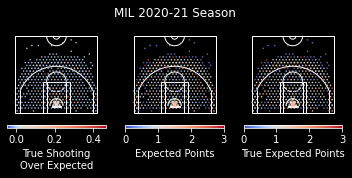

In [23]:
draw_season_all(2019, play_by_play_bins=play_by_play_season_bins)
draw_team_season_all(2020,"MIL",play_by_play_bins=play_by_play_season_team_bins)

In [38]:
def analyze_season( current_season, play_by_play_bins=play_by_play_season_bins, metric = 'expected_points'):
    current_player_play_by_play_bins = play_by_play_bins[ (play_by_play_bins.season == current_season) & (play_by_play_bins.playoffs == False)].copy()
    print(current_player_play_by_play_bins[metric].describe())
    
def analyze_team_season( current_season, current_team, play_by_play_bins=play_by_play_season_team_bins, metric = 'expected_points'):
    current_player_play_by_play_bins = play_by_play_bins[ (play_by_play_bins.season == current_season) &(play_by_play_bins.team == current_team) & (play_by_play_bins.playoffs == False)].copy()
    print(current_player_play_by_play_bins[metric].describe())

def find_correlations_season( current_season, play_by_play_bins=play_by_play_season_bins, metric_a = 'expected_points', metric_b = 'true_expected_points', method='pearson'):
    current_player_play_by_play_bins = play_by_play_bins[ (play_by_play_bins.season == current_season) & (play_by_play_bins.playoffs == False)].copy()
    return(current_player_play_by_play_bins[metric_a].corr(current_player_play_by_play_bins[metric_b],method))

In [14]:
analyze_season(2020, play_by_play_bins=play_by_play_season_bins,metric = 'true_shooting_over_expected',metric_label="True Shooting\nOver Expected")
analyze_team_season(2020, 'MIL', play_by_play_bins=play_by_play_season_team_bins,metric = 'true_shooting_over_expected',metric_label="True Shooting\nOver Expected")

count    634.000000
mean       0.024949
std        0.040362
min        0.000000
25%        0.000000
50%        0.000000
75%        0.038511
max        0.366413
Name: true_shooting_over_expected, dtype: float64
count    429.000000
mean       0.019545
std        0.063156
min       -0.045572
25%        0.000000
50%        0.000000
75%        0.000000
max        0.462925
Name: true_shooting_over_expected, dtype: float64


In [45]:
method = "pearson"
metric_a = 'expected_points'
metric_b = 'true_expected_points'
for season in play_by_play_season_bins.season.unique():
    print(str(season) + "-" + str(season % 2000+1) + " " + method + " correlation between " + metric_a + " and " + metric_b+": " + str(find_correlations_season(season, metric_a=metric_a, metric_b=metric_b, method=method)) )

2016-17 pearson correlation between expected_points and true_expected_points: 0.9966273787310482
2017-18 pearson correlation between expected_points and true_expected_points: 0.9966411703608541
2018-19 pearson correlation between expected_points and true_expected_points: 0.9957528530546584
2019-20 pearson correlation between expected_points and true_expected_points: 0.9919387923572085
2020-21 pearson correlation between expected_points and true_expected_points: 0.9966415761296181
